In [1]:
import numpy as np

import scipy.io

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

np.set_printoptions(precision=2,
                       threshold=100000,
                       linewidth=100,suppress='True')

# Enable matplotlib inline plotting in ipython notebook
%matplotlib inline

# Enable autoreload of external modules
%load_ext autoreload
%autoreload 2

# Load in the data
mat = scipy.io.loadmat('Mouse_Brain2013.mat')

# Number of rows
y_size = np.int32(mat['y_size'][0][0])
# Number of columns
x_size = np.int32(mat['x_size'][0][0])
# Number of total pixels
nb_pixels = y_size * x_size
# Number of bins
feat_size = len(mat['mz_values'][0])

# mapping from pixel index to row-col
row2grid = mat.get('row2grid')
# Baseline normalised non-zero pixels
ims_bn = mat.get('ims_bn')
# Number of nonzero pixels
nb_nonzero_pix = ims_bn.shape[1]
# List of booleans telling if the pixel is zero or not
nonnull_spots  = mat['nonnull_spots']





def get_img(data, bin_nb):
    """
    Generate an image from a specific mz bin in the MSI dataset.
    The data rows have to correspond to pixels.
    The data columns have to correspond to mz bins.
    """
    img = np.ndarray(shape=(y_size, x_size), dtype=float)
    nonzero_pix_idx = 0
    for pix_idx in xrange(nb_pixels):
        y, x = row2grid[pix_idx] - 1
        if nonnull_spots[pix_idx]:
            img[x,y] = data[nonzero_pix_idx, bin_nb]
            nonzero_pix_idx += 1
        else:
            img[x,y] = 0.0
    return img

def get_label_img(data):
       
    img = np.ndarray(shape=(y_size, x_size), dtype=float)
    nonzero_pix_idx = 0
    for pix_idx in xrange(nb_pixels):
        y, x = row2grid[pix_idx] - 1
        if nonnull_spots[pix_idx]:
            img[x,y] = data[nonzero_pix_idx]
            nonzero_pix_idx += 1
        else:
            img[x,y] = 0.0
    return img


    
    

#img = get_img(ims_bn.T, 1000)
#imgplot = plt.imshow(img)
#plt.colorbar()

test = np.zeros((nb_nonzero_pix, 15), dtype=float)

for j in range(15):    
    for i in range(j*nb_nonzero_pix/15 , (j+1)*nb_nonzero_pix/15):
        test[i , 0] = (j+1)*100+10*np.random.random_sample()
        test[i , 1] = (j+1)*200+10*np.random.random_sample()
        test[i , 2] = (j+1)*300+10*np.random.random_sample()
        test[i , 3] = (j+1)*400+10*np.random.random_sample()
        test[i , 4] = (j+1)*500+10*np.random.random_sample()
        
        test[i , 10] = (j+1)*1000+100*np.random.random_sample()
        test[i , 11] = (j+1)*2000+100*np.random.random_sample()
        test[i , 12] = (j+1)*3000+100*np.random.random_sample()
        test[i , 13] = (j+1)*4000+100*np.random.random_sample()
        test[i , 14] = (j+1)*5000+100*np.random.random_sample()
        
        
test2 = np.zeros((nb_nonzero_pix, 15), dtype=float)


for j in range(15):    
    for i in range(j*nb_nonzero_pix/15 , (j+1)*nb_nonzero_pix/15):
        test2[i , 0] = 100*np.random.random_sample()
        test2[i , 1] = 100*np.random.random_sample()
        test2[i , 2] = 100*np.random.random_sample()
        test2[i , 3] = 100*np.random.random_sample()
        test2[i , 4] = 100*np.random.random_sample()
        
        test2[i , 10] = 100*np.random.random_sample()
        test2[i , 11] = 100*np.random.random_sample()
        test2[i , 12] = 100*np.random.random_sample()
        test2[i , 13] = 100*np.random.random_sample()
        test2[i , 14] = 100*np.random.random_sample()
        
test3 = np.zeros((nb_nonzero_pix, 15), dtype=float)

for j in range(15):    
    for i in range(j*nb_nonzero_pix/15 , (j+1)*nb_nonzero_pix/15):
        test3[i , 0] = (j+1)*100
        test3[i , 1] = (j+1)*200
        test3[i , 2] = (j+1)*300
        test3[i , 3] = (j+1)*400
        test3[i , 4] = (j+1)*500
        
        test3[i , 10] = (j+1)*1000
        test3[i , 11] = (j+1)*2000
        test3[i , 12] = (j+1)*3000
        test3[i , 13] = (j+1)*4000
        test3[i , 14] = (j+1)*5000
        

In [2]:
pca = PCA(n_components=11)
A=pca.fit_transform(test2)
print (pca.components_)

print(pca.explained_variance_ratio_) 


[[ 0.46  0.42  0.35  0.32  0.11  0.    0.   -0.    0.    0.   -0.52 -0.02  0.23 -0.19  0.11]
 [-0.23  0.05 -0.14 -0.02  0.3   0.   -0.   -0.    0.    0.    0.1   0.41  0.56  0.1   0.57]
 [-0.03  0.02  0.57 -0.34 -0.55  0.    0.    0.    0.    0.   -0.05  0.14  0.14  0.45  0.1 ]
 [ 0.32 -0.17  0.08  0.02  0.53  0.   -0.   -0.   -0.   -0.   -0.09  0.31 -0.35  0.59 -0.07]
 [ 0.1  -0.49 -0.16  0.5  -0.37  0.   -0.    0.    0.    0.   -0.14  0.44  0.23 -0.   -0.26]
 [ 0.    0.41  0.11 -0.17  0.14  0.    0.   -0.    0.    0.    0.32  0.41  0.23 -0.13 -0.65]
 [-0.34  0.1   0.43  0.67  0.09  0.    0.    0.    0.    0.    0.42 -0.17 -0.06  0.16  0.02]
 [-0.19  0.6  -0.49  0.2  -0.3  -0.    0.   -0.   -0.    0.   -0.18  0.13 -0.22  0.38  0.01]
 [-0.69 -0.1   0.17 -0.06  0.23 -0.    0.    0.    0.   -0.   -0.61  0.04 -0.02 -0.05 -0.24]
 [-0.07  0.06  0.2  -0.   -0.12  0.    0.   -0.    0.    0.    0.05  0.56 -0.57 -0.45  0.31]
 [-0.   -0.   -0.    0.    0.   -0.49 -0.15 -0.13 -0.38  0.76  0.   -0

In [5]:
pca = PCA(n_components=1)
A=pca.fit_transform(test)
print (pca.components_)

print(pca.explained_variance_ratio_)

[[ 0.01  0.03  0.04  0.05  0.07  0.    0.    0.    0.    0.    0.13  0.27  0.4   0.54  0.67]]
[ 1.]


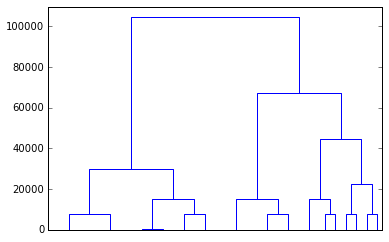

<matplotlib.colorbar.Colorbar instance at 0x000000001484AC88>

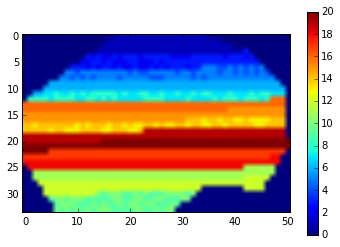

In [6]:
aant_cluster=20

#verschillende distance metrics: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html

from scipy.spatial.distance import pdist
dist = pdist(A, 'euclidean',p=2)

#dist = sch.distance.pdist(test)


link= sch.linkage(dist,method='complete')
label = sch.fcluster(link, aant_cluster, 'maxclust')


# calculate color threshold
ct=link[-(aant_cluster-1),2]  

#plot
P =sch.dendrogram(link,p=4, truncate_mode='level',no_labels='true',color_threshold=ct)
plt.show()

img=get_label_img(label)
imgplot = plt.imshow(img)
plt.colorbar()

In [3]:
whos

Variable         Type        Data/Info
--------------------------------------
A                ndarray     1381Lx11L: 15191 elems, type `float64`, 121528 bytes (118 kb)
PCA              type        <class 'sklearn.decomposition.pca.PCA'>
feat_size        int         6490
get_img          function    <function get_img at 0x0000000016282828>
get_label_img    function    <function get_label_img at 0x00000000162827B8>
i                int         1380
ims_bn           ndarray     6490Lx1381L: 8962690 elems, type `float64`, 71701520 bytes (68 Mb)
j                int         14
mat              dict        n=11
mpimg            module      <module 'matplotlib.image<...>es\matplotlib\image.pyc'>
nb_nonzero_pix   long        1381
nb_pixels        int32       1734
nonnull_spots    ndarray     1734Lx1L: 1734 elems, type `uint8`, 1734 bytes
np               module      <module 'numpy' from 'C:\<...>ages\numpy\__init__.pyc'>
pca              PCA         PCA(copy=True, n_components=11, whiten=Fals